In [200]:
import numpy as np
import tensorflow as tf
tf.debugging.set_log_device_placement(True) 

In [201]:
board = np.random.randint(
    low=np.iinfo(np.int64).min,
    high=np.iinfo(np.int64).max,
    size=(1024, 3, 12),
    dtype=np.int64
)
board, board.nbytes

(array([[[ 6773492570285678369,  4150258159234686966,
          -8588391447248627809, ...,  7617315617124585619,
           7997274895580816386, -1343672439201726253],
         [ 5217766693853196081, -1405527009067162689,
          -4107144997394765968, ..., -7130497713305163340,
           7805548329684184858, -8655561165777935597],
         [ 1154516484981336621, -9036798111057968353,
          -5595249794121271427, ..., -3673779606698740275,
          -1249175241919952415, -3437584258199457421]],
 
        [[ 8504009760560724998, -9111020958820323131,
          -8941951025871685895, ...,  7360677103090731126,
           9004315760914258863, -4147681685918671191],
         [-1129830630818754120, -2651813970053901858,
          -4491098729900710176, ...,  2660098388120477790,
          -1334239770941009104,   295457482422317635],
         [-6455588247612525724, -2049707293800040886,
           4524501170322256902, ..., -2762067085083338920,
           6152451663609228785,  58535459145

In [202]:
dataset = tf.data.Dataset.from_tensor_slices(board)
#  dataset = tf.data.FixedLengthRecordDataset(dataset, record_bytes=96)
#dataset = dataset.map(lambda s: tf.io.decode_raw(s, tf.float32))
#dataset = dataset.take(1_000_000)
dataset = dataset.batch(32)

for i in dataset.take(1):
    print(i)

tf.Tensor(
[[[ 6773492570285678369  4150258159234686966 -8588391447248627809 ...
    7617315617124585619  7997274895580816386 -1343672439201726253]
  [ 5217766693853196081 -1405527009067162689 -4107144997394765968 ...
   -7130497713305163340  7805548329684184858 -8655561165777935597]
  [ 1154516484981336621 -9036798111057968353 -5595249794121271427 ...
   -3673779606698740275 -1249175241919952415 -3437584258199457421]]

 [[ 8504009760560724998 -9111020958820323131 -8941951025871685895 ...
    7360677103090731126  9004315760914258863 -4147681685918671191]
  [-1129830630818754120 -2651813970053901858 -4491098729900710176 ...
    2660098388120477790 -1334239770941009104   295457482422317635]
  [-6455588247612525724 -2049707293800040886  4524501170322256902 ...
   -2762067085083338920  6152451663609228785  5853545914543088131]]

 [[ 1850601858241229910  -258032474673362956 -7182671729626087245 ...
    5301348935695157399 -3476682968141741886 -8854952768531848345]
  [-3607477127744792896  3

In [203]:
masks = tf.convert_to_tensor(2 ** np.arange(64, dtype=np.int64))

with tf.device('/gpu:0'):
    bits = tf.convert_to_tensor(board)
    masked = tf.bitwise.bitwise_and(tf.expand_dims(bits, -1), masks)
    expanded = tf.cast(tf.not_equal(masked, 0), dtype=tf.float32)


np.array(expanded).shape, np.array(expanded).dtype, np.array(expanded).nbytes

((1024, 3, 12, 64), dtype('float32'), 9437184)

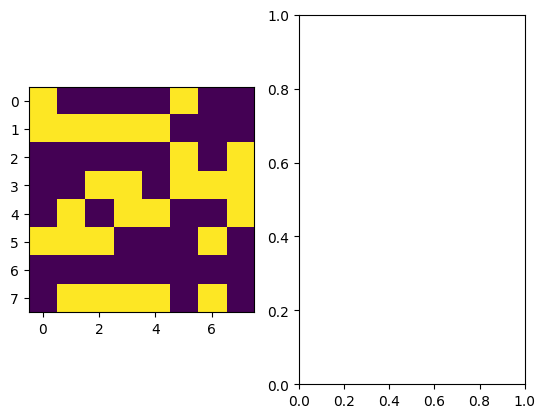

In [211]:
from matplotlib import pyplot as plt

fig, axs = plt.subplots(1, 2)
axs[0].imshow(expanded.numpy()[0][0][0].reshape((8, 8)), interpolation='nearest')
plt.show()
